# Titanic Tragedy

This is part of the "Titanic: Machine Learning from Disaster" competition held by Kaggle which involves the use of machine learning to create a model that predicts whether a passenger survived the Titanic shipwreck or not. 





![Titanic Ship](Titanic.jpg)

Content
  * [Data Clearing and Feature Engineering](#section)
    <a href="#section"></a>
     - [Training Dataset](#section1)
       <a href="#section1"></a>
     - [Test Dataset](#section2)
       <a href="#section2"></a>
  * [Exploratory Data Analysis (EDA)](#section7)
    <a href="#section7"></a>    
  * [Correlation](#section3)
    <a href="#section3"></a>
  * [Model Development](#section4)
    <a href="#section4"></a>
  * [Model Evaluation](#section5)
    <a href="#section5"></a> 
     - [Decision Tree](#section51)
       <a href="#section51"></a>
     - [RandomForest](#section52)
       <a href="#section52"></a>
  * [Result](#section6)
    <a href="#section6"></a>    

## Uploading the training and testing dataset here

In [1]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [2]:
all=["object","int64","float"]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Feature Explanation

* survival: Survival 	0 = No, 1 = Yes
* pclass: Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
* sex: Sex 	
* Age: Age in years 	
* sibsp: # of siblings / spouses aboard the Titanic 	
* parch: # of parents / children aboard the Titanic 	
* ticket: Ticket number 	
* fare: Passenger fare 	
* cabin: Cabin number 	
* embarked: Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
* pclass: A proxy for socio-economic status (SES)
   - 1st = Upper
   - 2nd = Middle
   - 3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

   - sibsp: The dataset defines family relations in this way...
   - Sibling = brother, sister, stepbrother, stepsister
   - Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
   - Parent = mother, father
   - Child = daughter, son, stepdaughter, stepson
   - Some children travelled only with a nanny, therefore parch=0 for them.

<a id="section"></a>
    
## 1. Data Clearing and Feature Engineering

<a id="section1"> </a>
## Training Dataset

In [5]:
train.describe(include=["object","int64","float"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Simonius-Blumer, Col. Oberst Alfons",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Embarked

In [6]:
train.groupby("Embarked").size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [7]:
train["Embarked"].fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [8]:
train["Embarked"][train["Embarked"].isnull()].count()

0

### FirstName, LastName and Title

In [9]:
train["LastName"]=train["Name"]
train["FirstName"]=train["Name"]
train["Title"]=train["Name"]
for i in range(0,len(train)):
    train.loc[i,"FirstName"]=train.loc[i,"Name"].split(",")[1].strip()
    train.loc[i,"LastName"]=train.loc[i,"Name"].split(",")[0].strip()
for i in range(0,len(train)):    
    train.loc[i,"Title"]=train.loc[i,"FirstName"].split(".")[0].strip()

In [10]:
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

### Sibling ,Husband,Wife, Parent and Children

In [11]:
train["Sibling"]=train["SibSp"]
train["Husband"]=train["SibSp"]
train["Wife"]=train["SibSp"]
train["Parent"]=train["Parch"]
train["Children"]=train["Parch"]
for i in range(0,len(train)):
    if (train.loc[i,"SibSp"]>0):
        for j in range(0,len(train)):
            x=0
            y=0
            if (train.loc[j,"Ticket"]==train.loc[i,"Ticket"]) &  ((train.loc[j,"Title"]!="Mrs") & (train.loc[i,"Title"]!="Mrs")):
                x=x+1
                train.loc[i,"Sibling"]=x
                train.loc[i,"Husband"]=0
                train.loc[i,"Wife"]=0
            elif (train.loc[j,"Ticket"]==train.loc[i,"Ticket"])& (train.loc[j,"Title"]=="Mrs"):
                y=y+1
                train.loc[i,"Sibling"]=0
                train.loc[i,"Husband"]=y
                train.loc[i,"Wife"]=0
            elif (train.loc[j,"Ticket"]==train.loc[i,"Ticket"])& (train.loc[i,"Title"]=="Mrs"):
                y=y+1
                train.loc[i,"Sibling"]=0
                train.loc[i,"Husband"]=0
                train.loc[i,"Wife"]=y    
            else:
                continue;
    else:
        continue;


In [12]:
for i in range(0,len(train)):        
    if (train.loc[i,"Parch"]>0):
        for j in range(0,len(train)):
            x=0
            y=0
            if (train.loc[i,"Title"]=="Master"):
                x=x+1
                train.loc[i,"Children"]=x
                train.loc[i,"Parent"]=0
            elif (train.loc[j,"Ticket"]==train.loc[i,"Ticket"]) & (train.loc[j,"Age"]>train.loc[i,"Age"]):
                y=y+1
                train.loc[i,"Children"]=y
                train.loc[i,"Parent"]=0
            elif (train.loc[j,"Ticket"]==train.loc[i,"Ticket"]) & (train.loc[j,"Age"]<train.loc[i,"Age"]):
                y=y+1
                train.loc[i,"Children"]=0
                train.loc[i,"Parent"]=y      
            else:
                continue;
    else:
        continue;

In [13]:
train[train["Parch"]==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,Title,Sibling,Husband,Wife,Parent,Children
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Master,0,1,0,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,Miss. Marguerite Rut,Miss,0,1,0,0,1
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,Rice,Master. Eugene,Master,0,1,0,0,1
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,Palsson,Miss. Torborg Danira,Miss,0,1,0,0,1
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,Panula,Master. Juha Niilo,Master,1,0,0,0,1


In [14]:
train[train["Ticket"]=="113803"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,Title,Sibling,Husband,Wife,Parent,Children
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,0,0,1,0,0
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1,C123,S,Futrelle,Mr. Jacques Heath,Mr,1,0,0,0,0


### Family Size

In [15]:
train["Family Size"]=train["SibSp"]+train["Parch"]+1

In [16]:
train["Family Size"].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

### Age

In [17]:
train["Family Size"][(train["Title"]=="Mr")&(train["Age"].isnull())].unique()

array([ 1,  2,  3, 11,  4], dtype=int64)

In [18]:
a1=train["Age"][(train["Title"]=="Mr") & (train["Family Size"]==1)].median()
train["Age"][(train["Title"]=="Mr") & (train["Family Size"]==1) &(train["Age"].isnull())]=a1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
a2=train["Age"][(train["Title"]=="Mr") & (train["Family Size"]==2)].median()
train["Age"][(train["Title"]=="Mr") & (train["Family Size"]==2) &(train["Age"].isnull())]=a2

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
a3=train["Age"][(train["Title"]=="Mr") & (train["Family Size"]==3)].median()
train["Age"][(train["Title"]=="Mr") & (train["Family Size"]==3) &(train["Age"].isnull())]=a3

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
a4=train["Age"][(train["Title"]=="Mr") & (train["Family Size"]>3)].median()
train["Age"][(train["Title"]=="Mr") & (train["Family Size"]>3) &(train["Age"].isnull())]=a4

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
train["Family Size"][(train["Title"]=="Mrs")&(train["Age"].isnull())].unique()

array([1, 2, 3], dtype=int64)

In [23]:
b1=train["Age"][(train["Title"]=="Mrs") & (train["Family Size"]==1)].median()
train["Age"][(train["Title"]=="Mrs") & (train["Family Size"]==1) &(train["Age"].isnull())]=b1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
b2=train["Age"][(train["Title"]=="Mrs") & (train["Family Size"]==2)].median()
train["Age"][(train["Title"]=="Mrs") & (train["Family Size"]==2) &(train["Age"].isnull())]=b2

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
b3=train["Age"][(train["Title"]=="Mrs") & (train["Family Size"]==3)].median()
train["Age"][(train["Title"]=="Mrs") & (train["Family Size"]==3) &(train["Age"].isnull())]=b3

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
train["Family Size"][(train["Title"]=="Miss")&(train["Age"].isnull())].unique()

array([ 1,  2,  3, 11,  5,  4], dtype=int64)

In [27]:
c1=train["Age"][(train["Title"]=="Miss") & (train["Family Size"]==1)].median()
train["Age"][(train["Title"]=="Miss") & (train["Family Size"]==1) &(train["Age"].isnull())]=c1

c2=train["Age"][(train["Title"]=="Miss") & (train["Family Size"]==2)].median()
train["Age"][(train["Title"]=="Miss") & (train["Family Size"]==2) &(train["Age"].isnull())]=c2

c3=train["Age"][(train["Title"]=="Miss") & (train["Family Size"]==3)].median()
train["Age"][(train["Title"]=="Miss") & (train["Family Size"]==3) &(train["Age"].isnull())]=c3

c4=train["Age"][(train["Title"]=="Miss") & (train["Family Size"]>3)].median()
train["Age"][(train["Title"]=="Miss") & (train["Family Size"]>3) &(train["Age"].isnull())]=c4

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [28]:
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,LastName,FirstName,Title,Sibling,Husband,Wife,Parent,Children,Family Size
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,...,C,Moubarek,Master. Gerios,Master,1,0,0,0,1,3
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,...,S,Sage,Master. Thomas Henry,Master,1,0,0,0,1,11
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,...,S,Lefebre,Master. Henry Forbes,Master,1,0,0,0,1,5
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,...,C,Moubarek,"Master. Halim Gonios (""William George"")",Master,1,0,0,0,1,3
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,...,C,Brewe,Dr. Arthur Jackson,Dr,0,0,0,0,0,1


In [29]:
d=train["Age"][(train["Title"]=="Master") ].median()
train["Age"][(train["Title"]=="Master")&(train["Age"].isnull())]=d
e=train["Age"][(train["Title"]=="Dr")].median()
train["Age"][(train["Title"]=="Dr") &(train["Age"].isnull())]=e

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
train["Age"].isnull().value_counts()

False    891
Name: Age, dtype: int64

### Adding values to categorical variables in Training Dataset

### Age

In [31]:
for i in range(0,len(train)):
    if(0<train.loc[i,"Age"]<=18):
        train.loc[i,"Age"]=0
    elif(18<train.loc[i,"Age"]<=34):
        train.loc[i,"Age"]=1
    elif(34<train.loc[i,"Age"]<=50):
        train.loc[i,"Age"]=1
    elif(50<train.loc[i,"Age"]<=70):
        train.loc[i,"Age"]=1
    elif(70<train.loc[i,"Age"]):
        train.loc[i,"Age"]=1  

### Title

In [32]:
for i in range(0,len(train)):
    if train.loc[i,"Title"]=="Mr":
        train.loc[i,"Title"]=0
    elif train.loc[i,"Title"]=="Mrs" :
        train.loc[i,"Title"]=1
    elif train.loc[i,"Title"]=="Miss" or train.loc[i,"Title"]=="Mme" or train.loc[i,"Title"]=="Mlle" or train.loc[i,"Title"]=="Ms":
        train.loc[i,"Title"]=2
    elif train.loc[i,"Title"]=="Master":
        train.loc[i,"Title"]=3
    else:
        train.loc[i,"Title"]=4

### Cabin

In [33]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [34]:
train[train["Cabin"]=="T"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,LastName,FirstName,Title,Sibling,Husband,Wife,Parent,Children,Family Size
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,1.0,0,0,113784,35.5,...,S,Blackwell,Mr. Stephen Weart,0,0,0,0,0,0,1


In [35]:
train["Cabin"][train["Cabin"].isnull()]="NaN"
for i in range(0,len(train)):
    if train.loc[i,"Cabin"].startswith("A") is True:
        train.loc[i,"Cabin"]=0
    elif train.loc[i,"Cabin"].startswith("B") is True:
        train.loc[i,"Cabin"]=0   
    elif train.loc[i,"Cabin"].startswith("C") is True:
        train.loc[i,"Cabin"]=0 
    elif train.loc[i,"Cabin"].startswith("D") is True:
        train.loc[i,"Cabin"]=0 
    elif train.loc[i,"Cabin"].startswith("E") is True:
        train.loc[i,"Cabin"]=0 
    elif train.loc[i,"Cabin"].startswith("F") is True:
        train.loc[i,"Cabin"]=1    
    elif train.loc[i,"Cabin"].startswith("G") is True:
        train.loc[i,"Cabin"]=1
    elif train.loc[i,"Cabin"].startswith("T") is True:
        train.loc[i,"Cabin"]=0  
    

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
train["Cabin"][(train["Cabin"]=="NaN") & (train["Pclass"]==1)]=0
train["Cabin"][(train["Cabin"]=="NaN") & (train["Pclass"]==2)]=0
train["Cabin"][(train["Cabin"]=="NaN") & (train["Pclass"]==3)]=1
train["Cabin"]=train["Cabin"].astype(int)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
train["Cabin"].isnull().value_counts()

False    891
Name: Cabin, dtype: int64

### Family Size

In [38]:
for i in range(0,len(train)):
    if train.loc[i,"Family Size"]>=4:
        train.loc[i,"Family Size"]=4
    
    else:
        continue;
      

### Sex and Embarked

In [39]:
train["Sex"]=train["Sex"].map({"male":0,"female":1})
train["Embarked"]=train["Embarked"].map({"S":0,"Q":1,"C":2})

In [40]:
train["Cabin"]=train["Cabin"].astype(int)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,LastName,FirstName,Title,Sibling,Husband,Wife,Parent,Children,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,...,0.0,Braund,Mr. Owen Harris,0,1,0,0,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1.0,1,0,PC 17599,71.2833,...,2.0,Cumings,Mrs. John Bradley (Florence Briggs Thayer),1,0,1,0,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,...,0.0,Heikkinen,Miss. Laina,2,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1.0,1,0,113803,53.1000,...,0.0,Futrelle,Mrs. Jacques Heath (Lily May Peel),1,0,0,1,0,0,2
4,5,0,3,"Allen, Mr. William Henry",0,1.0,0,0,373450,8.0500,...,0.0,Allen,Mr. William Henry,0,0,0,0,0,0,1


In [42]:
train.describe(include=all)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,Title,Sibling,Husband,Wife,Parent,Children,Family Size
count,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891.000000,889.000000,891,891,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,NaN,667,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Simonius-Blumer, Col. Oberst Alfons",NaN,NaN,NaN,NaN,1601,NaN,NaN,Andersson,Mr. John,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,NaN,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,0.352413,0.823793,0.523008,0.381594,NaN,32.204208,0.464567,NaN,NaN,0.795735,0.182941,0.098765,0.035915,0.157127,0.181818,1.716049
std,257.353842,0.486592,0.836071,NaN,0.477990,0.381210,1.102743,0.806057,NaN,49.693429,0.792088,NaN,NaN,1.077254,0.386835,0.298514,0.186182,0.426644,0.445383,1.022863
min,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,1.000000,0.000000,0.000000,NaN,7.910400,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,NaN,0.000000,1.000000,0.000000,0.000000,NaN,14.454200,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,1.000000,1.000000,0.000000,NaN,31.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


<a id="section2"></a>
## Test Dataset

In [43]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
test.describe(include=["object","int64","float"])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Andrew, Mr. Frank Thomas",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


### Data Clearing and Feature Engineering

### Family Size

In [45]:
test["Family Size"]=test["SibSp"]+test["Parch"]+1

In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


###  FirstName, LastName and Title

In [47]:
test["LastName"]=test["Name"]
test["FirstName"]=test["Name"]
test["Title"]=test["Name"]
for i in range(0,len(test)):
    test.loc[i,"FirstName"]=test.loc[i,"Name"].split(",")[1].strip()
    test.loc[i,"LastName"]=test.loc[i,"Name"].split(",")[0].strip()
for i in range(0,len(test)):    
    test.loc[i,"Title"]=test.loc[i,"FirstName"].split(".")[0].strip()

### Sibling ,Husband,Wife, Parent and Children

In [48]:
test["Sibling"]=test["SibSp"]
test["Husband"]=test["SibSp"]
test["Wife"]=test["SibSp"]
test["Parent"]=test["Parch"]
test["Children"]=test["Parch"]
for i in range(0,len(test)):
    if (test.loc[i,"SibSp"]>0):
        for j in range(0,len(test)):
            x=0
            y=0
            if (test.loc[j,"Ticket"]==test.loc[i,"Ticket"]) &  ((test.loc[j,"Title"]!="Mrs") & (test.loc[i,"Title"]!="Mrs")):
                x=x+1
                test.loc[i,"Sibling"]=x
                test.loc[i,"Husband"]=0
                test.loc[i,"Wife"]=0
            elif (test.loc[j,"Ticket"]==test.loc[i,"Ticket"])& (test.loc[j,"Title"]=="Mrs"):
                y=y+1
                test.loc[i,"Sibling"]=0
                test.loc[i,"Husband"]=y
                test.loc[i,"Wife"]=0
            elif (test.loc[j,"Ticket"]==test.loc[i,"Ticket"])& (test.loc[i,"Title"]=="Mrs"):
                y=y+1
                test.loc[i,"Sibling"]=0
                test.loc[i,"Husband"]=0
                test.loc[i,"Wife"]=y    
            else:
                continue;
    else:
        continue;



In [49]:


for i in range(0,len(test)):        
    if (test.loc[i,"Parch"]>0):
        for j in range(0,len(test)):
            x=0
            y=0
            if (train.loc[i,"Title"]=="Master"):
                x=x+1
                test.loc[i,"Children"]=x
                test.loc[i,"Parent"]=0
            elif (test.loc[j,"Ticket"]==test.loc[i,"Ticket"]) & (test.loc[j,"Age"]>test.loc[i,"Age"]):
                y=y+1
                test.loc[i,"Children"]=y
                test.loc[i,"Parent"]=0
            elif (test.loc[j,"Ticket"]==test.loc[i,"Ticket"]) & (test.loc[j,"Age"]<test.loc[i,"Age"]):
                y=y+1
                test.loc[i,"Children"]=0
                test.loc[i,"Parent"]=y      
            else:
                continue;
    else:
        continue;

### Age

In [50]:
test["Title"][(test["Age"].isnull())].value_counts()

Mr        57
Miss      14
Mrs       10
Master     4
Ms         1
Name: Title, dtype: int64

In [51]:
test["Family Size"][(test["Title"]=="Mr")&(test["Age"].isnull())].unique()

array([ 1,  3,  2, 11], dtype=int64)

In [52]:


a1=test["Age"][(test["Title"]=="Mr") & (test["Family Size"]==1)].median()
test["Age"][(test["Title"]=="Mr") & (test["Family Size"]==1) &(test["Age"].isnull())]=a1

a2=test["Age"][(test["Title"]=="Mr") & (test["Family Size"]==2)].median()
test["Age"][(test["Title"]=="Mr") & (test["Family Size"]==2) &(test["Age"].isnull())]=a2

a3=test["Age"][(test["Title"]=="Mr") & (test["Family Size"]==3)].median()
test["Age"][(test["Title"]=="Mr") & (test["Family Size"]==3) &(test["Age"].isnull())]=a3

a4=test["Age"][(test["Title"]=="Mr") & (test["Family Size"]>3)].median()
test["Age"][(test["Title"]=="Mr") & (test["Family Size"]>3) &(test["Age"].isnull())]=a4

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykern

In [53]:
test["Family Size"][(test["Title"]=="Mrs")&(test["Age"].isnull())].unique()

array([ 1,  4,  5,  3,  2, 11], dtype=int64)

In [54]:
a1=test["Age"][(test["Title"]=="Mrs") & (test["Family Size"]==1)].median()
test["Age"][(test["Title"]=="Mrs") & (test["Family Size"]==1) &(test["Age"].isnull())]=a1

a2=test["Age"][(test["Title"]=="Mrs") & (test["Family Size"]==2)].median()
test["Age"][(test["Title"]=="Mrs") & (test["Family Size"]==2) &(test["Age"].isnull())]=a2

a3=test["Age"][(test["Title"]=="Mrs") & (test["Family Size"]==3)].median()
test["Age"][(test["Title"]=="Mrs") & (test["Family Size"]==3) &(test["Age"].isnull())]=a3

a4=test["Age"][(test["Title"]=="Mrs") & (test["Family Size"]>3)].median()
test["Age"][(test["Title"]=="Mrs") & (test["Family Size"]>3) &(test["Age"].isnull())]=a4

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [55]:
test["Family Size"][(test["Title"]=="Miss")&(test["Age"].isnull())].unique()

array([ 1,  3, 11,  2], dtype=int64)

In [56]:
a1=test["Age"][(test["Title"]=="Miss") & (test["Family Size"]==1)].median()
test["Age"][(test["Title"]=="Miss") & (test["Family Size"]==1) &(test["Age"].isnull())]=a1

a2=test["Age"][(test["Title"]=="Miss") & (test["Family Size"]==2)].median()
test["Age"][(test["Title"]=="Miss") & (test["Family Size"]==2) &(test["Age"].isnull())]=a2

a3=test["Age"][(test["Title"]=="Miss") & (test["Family Size"]==3)].median()
test["Age"][(test["Title"]=="Miss") & (test["Family Size"]==3) &(test["Age"].isnull())]=a3

a4=test["Age"][(test["Title"]=="Miss") & (test["Family Size"]>3)].median()
test["Age"][(test["Title"]=="Miss") & (test["Family Size"]>3) &(test["Age"].isnull())]=a4

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [57]:
test["Family Size"][(test["Title"]=="Ms")&(test["Age"].isnull())].unique()

array([1], dtype=int64)

In [58]:
test["Age"][(test["Title"]=="Ms") & (test["Family Size"]==1) &(test["Age"].isnull())]=a1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
d=test["Age"][(test["Title"]=="Master") ].median()
test["Age"][(test["Title"]=="Master")&(test["Age"].isnull())]=d

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
train["Age"].isnull().value_counts()

False    891
Name: Age, dtype: int64

In [61]:
fmed=test["Fare"].median()
test["Fare"][test["Fare"].isnull()]=fmed

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Assigning values to Categorical variables

### Title

In [62]:


for i in range(0,len(test)):
    if test.loc[i,"Title"]=="Mr":
        test.loc[i,"Title"]=0
    elif test.loc[i,"Title"]=="Mrs" :
        test.loc[i,"Title"]=1
    elif test.loc[i,"Title"]=="Miss" or test.loc[i,"Title"]=="Mme" or test.loc[i,"Title"]=="Mlle" or train.loc[i,"Title"]=="Ms":
        test.loc[i,"Title"]=2
    elif test.loc[i,"Title"]=="Master":
        test.loc[i,"Title"]=3
    else:
        test.loc[i,"Title"]=4


### Age

In [63]:
for i in range(0,len(test)):
    if(0<test.loc[i,"Age"]<=18):
        test.loc[i,"Age"]=0
    elif(18<test.loc[i,"Age"]<=34):
        test.loc[i,"Age"]=1
    elif(34<test.loc[i,"Age"]<=50):
        test.loc[i,"Age"]=1
    elif(50<test.loc[i,"Age"]<=70):
        test.loc[i,"Age"]=1
    elif(70<test.loc[i,"Age"]):
        test.loc[i,"Age"]=1  

### Cabin

In [64]:
test["Cabin"][test["Cabin"].isnull()]="NaN"
for i in range(0,len(test)):
    if test.loc[i,"Cabin"].startswith("A") is True:
        test.loc[i,"Cabin"]=0
    elif test.loc[i,"Cabin"].startswith("B") is True:
        test.loc[i,"Cabin"]=0
    elif test.loc[i,"Cabin"].startswith("C") is True:
        test.loc[i,"Cabin"]=0 
    elif test.loc[i,"Cabin"].startswith("D") is True:
        test.loc[i,"Cabin"]=0 
    elif test.loc[i,"Cabin"].startswith("E") is True:
        test.loc[i,"Cabin"]=0 
    elif test.loc[i,"Cabin"].startswith("F") is True:
        test.loc[i,"Cabin"]=1    
    elif test.loc[i,"Cabin"].startswith("G") is True:
        test.loc[i,"Cabin"]=1
    elif test.loc[i,"Cabin"].startswith("T") is True:
        test.loc[i,"Cabin"]=0   
    

test["Cabin"][(test["Cabin"]=="NaN") & (test["Pclass"]==1)]=0
test["Cabin"][(test["Cabin"]=="NaN") & (test["Pclass"]==2)]=0
test["Cabin"][(test["Cabin"]=="NaN") & (test["Pclass"]==3)]=1
test["Cabin"]=test["Cabin"].astype(int)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is t

### Family Size

      

In [65]:

for i in range(0,len(test)):
    if test.loc[i,"Family Size"]>=4:
        test.loc[i,"Family Size"]=4
    
    else:
        continue;

### Sex and Embarked

In [66]:
test["Sex"]=test["Sex"].map({"male":0,"female":1})
test["Embarked"]=test["Embarked"].map({"S":0,"Q":1,"C":2})

In [67]:
test["Cabin"]=test["Cabin"].astype(int)

In [68]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,LastName,FirstName,Title,Sibling,Husband,Wife,Parent,Children
0,892,3,"Kelly, Mr. James",0,1.0,0,0,330911,7.8292,1,1,1,Kelly,Mr. James,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1.0,1,0,363272,7.0000,1,0,2,Wilkes,Mrs. James (Ellen Needs),1,0,1,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,1.0,0,0,240276,9.6875,0,1,1,Myles,Mr. Thomas Francis,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,315154,8.6625,1,0,1,Wirz,Mr. Albert,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,1,0,3,Hirvonen,Mrs. Alexander (Helga E Lindqvist),1,0,1,0,1,1


In [69]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int32
Embarked         int64
Family Size      int64
LastName        object
FirstName       object
Title            int64
Sibling          int64
Husband          int64
Wife             int64
Parent           int64
Children         int64
dtype: object

In [70]:
test.describe(include=all)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,LastName,FirstName,Title,Sibling,Husband,Wife,Parent,Children
count,418.000000,418.000000,418,418.000000,418.000000,418.000000,418.000000,418,418.000000,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
unique,NaN,NaN,418,NaN,NaN,NaN,NaN,363,NaN,NaN,NaN,352,381,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,"Andrew, Mr. Frank Thomas",NaN,NaN,NaN,NaN,PC 17608,NaN,NaN,NaN,Sage,Mr. Patrick,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,4,7,NaN,NaN,NaN,NaN,NaN,NaN
mean,1100.500000,2.265550,NaN,0.363636,0.856459,0.447368,0.392344,NaN,35.576535,0.598086,1.693780,NaN,NaN,0.763158,0.196172,0.105263,0.021531,0.263158,0.246411
std,120.810458,0.841838,NaN,0.481622,0.351044,0.896760,0.981429,NaN,55.850103,0.854496,0.987699,NaN,NaN,1.029019,0.397576,0.307260,0.145320,0.803250,0.798109
min,892.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,1.000000,0.000000,0.000000,NaN,7.895800,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,NaN,0.000000,1.000000,0.000000,0.000000,NaN,14.454200,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1204.750000,3.000000,NaN,1.000000,1.000000,1.000000,0.000000,NaN,31.471875,1.000000,2.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<a id="section7"></a>
## Exploratory Data Analysis (EDA)

Checking relation of feature variables with target variable,which is column "Survived"

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

### Relation of Sex with Survived

[(0, 600)]

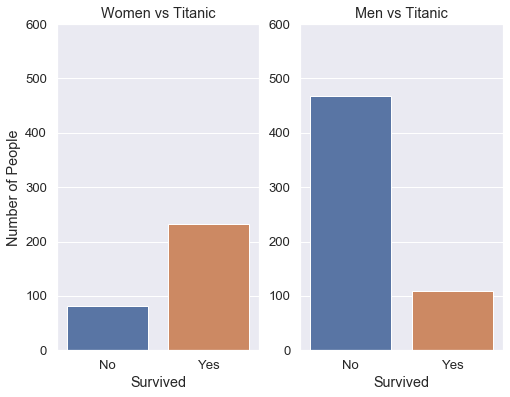

In [72]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(1,2,figsize=(8,6))
c1=sns.countplot(x="Survived",data=train[train["Sex"]==1],ax=axs[0])
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Number of People")
c1.set_title("Women vs Titanic")
c1.set(ylim=(0,600))
c2=sns.countplot(x="Survived",data=train[train["Sex"]==0],ax=axs[1])
c2.set_xticklabels(["No","Yes"])
c2.set(ylabel="")
c2.set_title("Men vs Titanic")
c2.set(ylim=(0,600))

From above figure, Women on board the Titanic mostly survived the crash while its the opposite for Men as most weren't able to save themselves. 

### Relation of Pclass with Survived

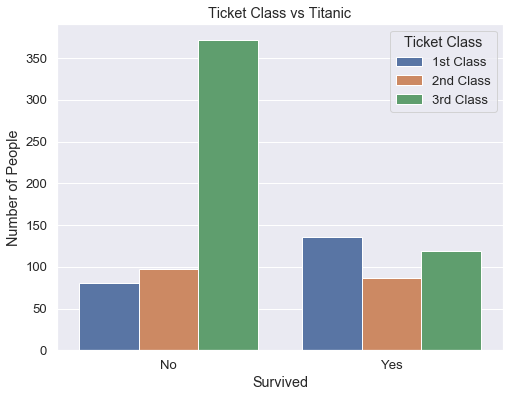

In [73]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8,6))
c1=sns.countplot(hue="Pclass",x="Survived",data=train,ax=axs)
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Number of People")
c1.set_title("Ticket Class vs Titanic")
plt.legend(title='Ticket Class', loc='upper right', labels=['1st Class', '2nd Class','3rd Class'])
plt.show(c1)

From abovefigure, first class ticket holders and second class ticket holders do not show significant difference between those who survived or not. Meanwhile, third class holders show a significant difference between survivors and casualities as most of these ticket holders couldn't make it ashore. 

### Relation of Age with Survived

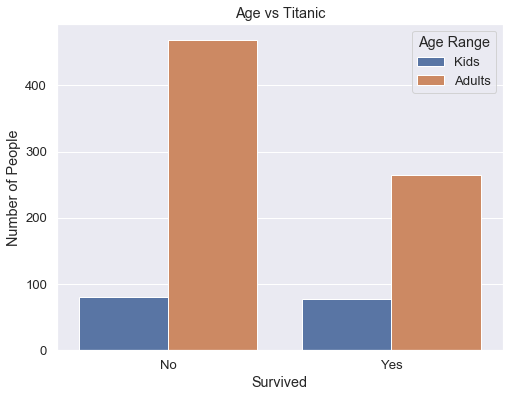

In [74]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8,6))
c1=sns.countplot(hue="Age",x="Survived",data=train,ax=axs)
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Number of People")
c1.set_title("Age vs Titanic")
plt.legend(title='Age Range', loc='upper right', labels=['Kids', 'Adults'])
plt.show(c1)

From above figure, Adults shows the biggest gap between people who did or didn't survive as most of them didn't survive. Kids shows less or insignificant gap between those who did or didn't survive the crash. 

### Relation of  Port of Embarkation  with Survived

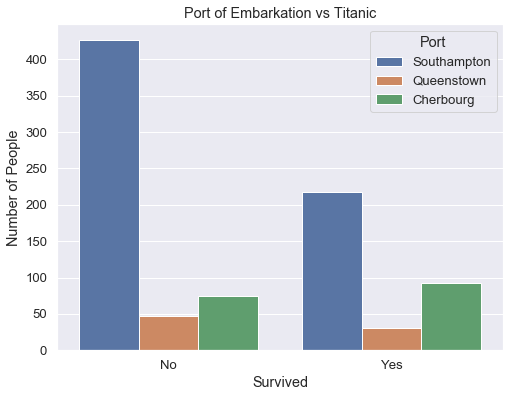

In [75]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8,6))
c1=sns.countplot(hue="Embarked",x="Survived",data=train,ax=axs)
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Number of People")
c1.set_title("Port of Embarkation vs Titanic")
plt.legend(title='Port', loc='upper right', labels=['Southampton', 'Queenstown','Cherbourg' ])
plt.show(c1)

From above figure, passengers boarding from Southampton show a signifcant difference between people who did or didn't survive as most of them didn't survive. On the other hand, people boarding from Queenstown and Cherbourg show less or insignificant differnce between people who did or didn't survive the tragedy. 

### Relation of a Person's Title with Survived

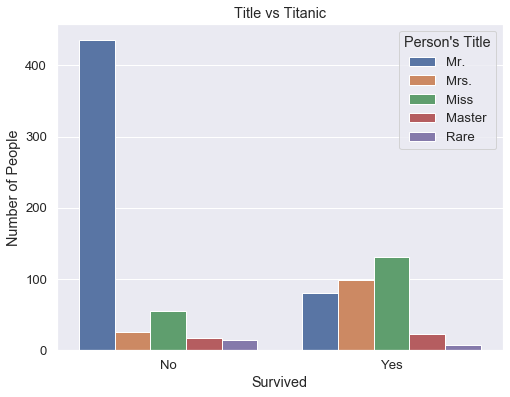

In [76]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8,6))
c1=sns.countplot(hue="Title",x="Survived",data=train,ax=axs)
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Number of People")
c1.set_title("Title vs Titanic")
plt.legend(title="Person's Title", loc='upper right', labels=['Mr.', 'Mrs.','Miss','Master','Rare' ])
plt.show(c1)

From above figure, not many people with the title 'Mr.' survived while, on the other hand those with other titles showed an opposite trend as many of them survived the tragedy. 

### Relation of Family Size with Survived

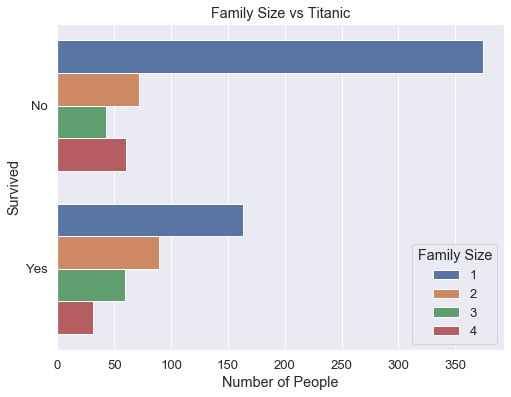

In [77]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8,6))
c1=sns.countplot(hue="Family Size",y="Survived",data=train,ax=axs)
c1.set_yticklabels(["No","Yes"])
c1.set(xlabel="Number of People")
c1.set_title("Family Size vs Titanic")
plt.legend(title="Family Size", loc='lower right')
plt.show(c1)

From above figure, people who were all by themselves on the ship show significant change in survival as most of them didn't. On the other hand, those who weren't all alone show less or insignifcant change between people who did or didn't survive the tragedy.  

### Relation of Ticket Fare vs Survived

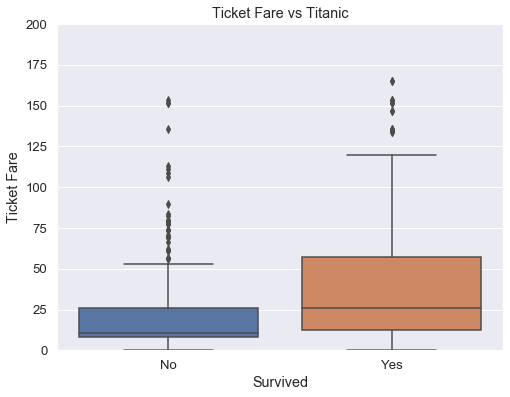

In [78]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8,6))
c1=sns.boxplot(y="Fare",x="Survived",data=train,ax=axs)
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Ticket Fare")
c1.set_title("Ticket Fare vs Titanic")
c1.set(ylim=(0,200))
plt.show(c1)

It's important to get the best tickets in the house as it provides more value and sometimes might just be the reason to survive a tragedy.

### Relation of Cabin with Survived

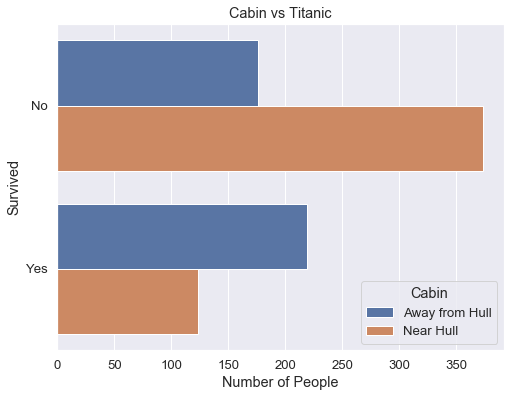

In [79]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8,6))
c1=sns.countplot(hue="Cabin",y="Survived",data=train,ax=axs)
c1.set_yticklabels(["No","Yes"])
c1.set(xlabel="Number of People")
c1.set_title("Cabin vs Titanic")
plt.legend(title="Cabin", loc='lower right',labels=['Away from Hull','Near Hull' ])
plt.show(c1)

<a id="section3"></a>

## Correlation

In [80]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Sibling,Husband,Wife,Parent,Children,Family Size
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.009987,-0.057527,-0.001652,0.012658,-0.045499,-0.013166,-0.025436,-0.015406,-0.013997,-0.079144,0.036471,-0.024222,-0.037963
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.101384,-0.035322,0.081629,0.257307,-0.313036,0.169718,0.406965,-0.045161,0.140955,0.157724,0.050132,0.118302,0.124413
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.167607,0.083081,0.018443,-0.549500,0.905511,-0.164681,-0.122042,0.037143,-0.113271,-0.085727,-0.016411,0.027157,-0.018281
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.164463,0.114631,0.245489,0.182333,-0.131456,0.110320,0.565465,-0.063461,0.236139,0.261638,0.224035,0.173690,0.266951
Age,0.009987,-0.101384,-0.167607,-0.164463,1.000000,-0.392606,-0.325768,-0.001098,-0.163672,-0.015140,-0.416074,-0.344993,-0.014750,0.025941,-0.092097,-0.479489,-0.445433
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.392606,1.000000,0.414838,0.159651,0.099600,-0.068900,0.268796,0.607787,0.235431,0.099951,0.317102,0.465030,0.726502
Parch,-0.001652,0.081629,0.018443,0.245489,-0.325768,0.414838,1.000000,0.216225,0.021677,-0.040449,0.267141,0.280349,0.076674,0.185595,0.635726,0.582704,0.797969
Fare,0.012658,0.257307,-0.549500,0.182333,-0.001098,0.159651,0.216225,1.000000,-0.414021,0.226311,0.141428,0.131456,0.055887,0.118108,0.143459,0.126111,0.247557
Cabin,-0.045499,-0.313036,0.905511,-0.131456,-0.163672,0.099600,0.021677,-0.414021,1.000000,-0.075605,-0.112651,0.059964,-0.136211,-0.070586,-0.015550,0.029530,-0.011405
Embarked,-0.013166,0.169718,-0.164681,0.110320,-0.015140,-0.068900,-0.040449,0.226311,-0.075605,1.000000,0.085771,-0.002660,0.005320,0.031533,0.016514,0.024684,-0.017217


### &nbsp; Plotting a Heatmap to visualize correlation

(17.0, 1.0)

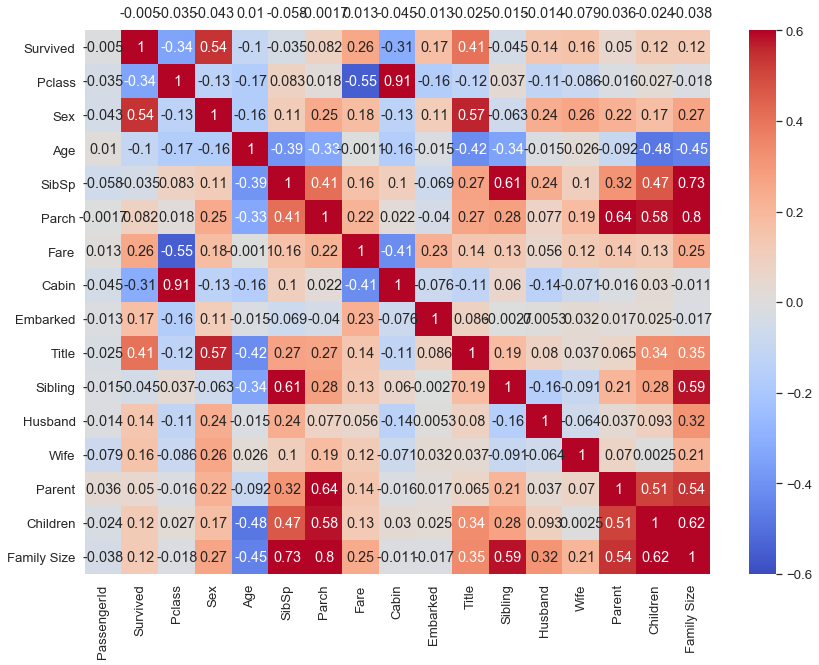

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(14,10))
heat=sns.heatmap(train.corr(),vmin=-0.6,vmax=0.6,annot=True,ax=ax,cmap="coolwarm")
plt.yticks(rotation=0)
bottom,top=heat.get_ylim()
heat.set_ylim(bottom+0.5,top+0.5)

<a id="section4"></a>

## Model Development using Pipeline

What Are Pipelines

Pipelines are a simple way to keep your data processing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

Many data scientists hack together models without pipelines, but Pipelines have some important benefits. Those include:

* Cleaner Code: You won't need to keep track of your training (and validation) data at each step of processing. Accounting  
  for data at each step of processing can get messy. With a pipeline, you don't need to manually keep track of each step.
* Fewer Bugs: There are fewer opportunities to mis-apply a step or forget a pre-processing step.
* Easier to Productionize: It can be surprisingly hard to transition a model from a prototype to something deployable at 
  scale. 
  




###  Feature Selection

In [82]:
features=["Sex","Title","Cabin","Fare"]
X=train[features]

y=train["Survived"]



###  Train, test split

In [83]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X, y, test_size=0.33)

### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

DT_pipeline = make_pipeline(SimpleImputer(), DecisionTreeClassifier())

DT_pipeline.fit(X_train1, y_train1)
DT_predictions= DT_pipeline.predict(X_test1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test1, DT_predictions)

0.847457627118644

## RandomForest

In [85]:
from sklearn.ensemble import RandomForestClassifier
RF_pipeline = make_pipeline(SimpleImputer(), RandomForestClassifier( random_state=0))

RF_pipeline.fit(X_train1, y_train1)
RF_predictions= RF_pipeline.predict(X_test1)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [86]:
accuracy_score(y_test1, RF_predictions)

0.8508474576271187

<a id="section5"></a>
## Model Evaluation

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

<a id="section51"></a>
### Decision Tree

In [88]:
import numpy as np
cm = pd.DataFrame(confusion_matrix(y_test1, DT_predictions))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No            178             24    202
Actual Yes            21             72     93
Total                199             96    295


In [89]:
print(classification_report(y_test1, DT_predictions))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       202
           1       0.75      0.77      0.76        93

   micro avg       0.85      0.85      0.85       295
   macro avg       0.82      0.83      0.82       295
weighted avg       0.85      0.85      0.85       295



In [90]:
# Calculate area under the curve (logit_roc_auc)
logit_roc_auc = roc_auc_score(y_test1, DT_predictions) 
# Plot ROC

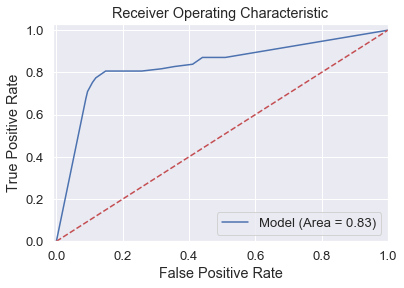

In [91]:
fpr, tpr, thresholds = roc_curve(y_test1, DT_pipeline.predict_proba(X_test1)[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Model (Area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<a id="section52"></a>
### RandomForest

In [92]:
cm = pd.DataFrame(confusion_matrix(y_test1, RF_predictions))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No            178             24    202
Actual Yes            20             73     93
Total                198             97    295


In [93]:
print(classification_report(y_test1, RF_predictions))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       202
           1       0.75      0.78      0.77        93

   micro avg       0.85      0.85      0.85       295
   macro avg       0.83      0.83      0.83       295
weighted avg       0.85      0.85      0.85       295



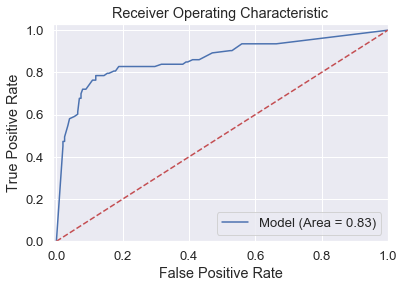

In [94]:
# Calculate area under the curve (logit_roc_auc)
logit_roc_auc = roc_auc_score(y_test1, RF_predictions) 
# Plot ROC

fpr, tpr, thresholds = roc_curve(y_test1, RF_pipeline.predict_proba(X_test1)[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Model (Area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<a id="section6"></a>
## Result

From above confusion matrix and ROC graphs, RandomForest Model turns out to be the better one.

In [96]:
X1=test[features]
RF_result= RF_pipeline.predict(X1)
survived=pd.DataFrame(data={"Survived":RF_result})
passid=pd.DataFrame(data={"PassengerId":test["PassengerId"]})
result=passid.join(survived)

In [97]:
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [98]:
result.to_csv("resultfinale.csv",index=False)